In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test_A.csv')

D:\software_new\anaconda\conda\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


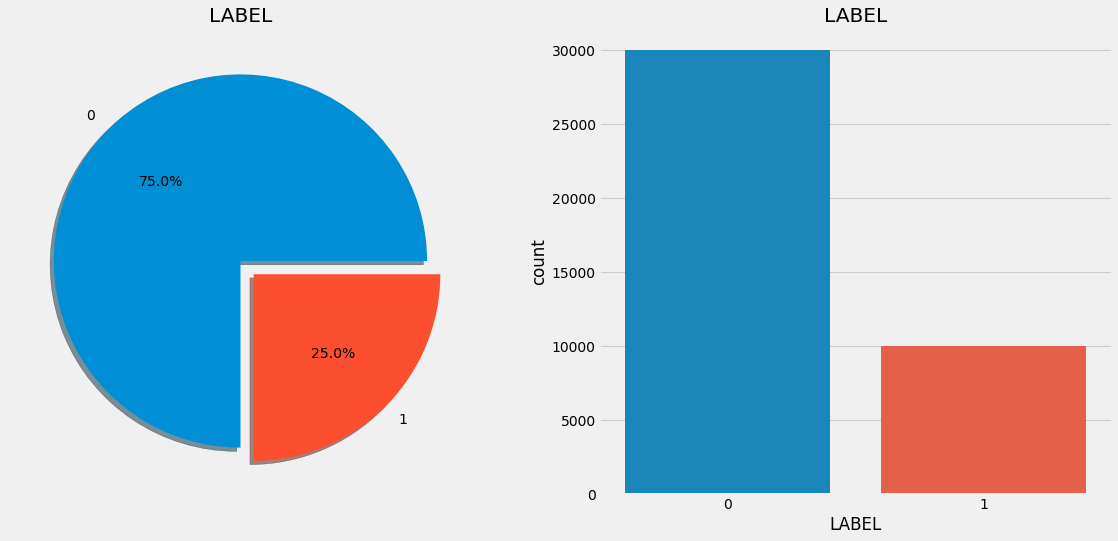

In [3]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['LABEL'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LABEL')
ax[0].set_ylabel('')
sns.countplot('LABEL',data=train_data,ax=ax[1])
ax[1].set_title('LABEL')
plt.show()

In [5]:
print(train_data.shape,test_data.shape)
train_data.info()

(40000, 51) (12000, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_UID                                 40000 non-null  object 
 1   LABEL                                    40000 non-null  int64  
 2   AGN_CNT_RCT_12_MON                       18592 non-null  float64
 3   ICO_CUR_MON_ACM_TRX_TM                   36497 non-null  float64
 4   NB_RCT_3_MON_LGN_TMS_AGV                 36185 non-null  float64
 5   AGN_CUR_YEAR_AMT                         17459 non-null  float64
 6   AGN_CUR_YEAR_WAG_AMT                     12015 non-null  float64
 7   AGN_AGR_LATEST_AGN_AMT                   20407 non-null  float64
 8   ICO_CUR_MON_ACM_TRX_AMT                  36497 non-null  float64
 9   COUNTER_CUR_YEAR_CNT_AMT                 39054 non-null  float64
 10  PUB_TO_PRV_TRX_AMT_CUR

In [17]:
train_data["AGN_CNT_RCT_12_MON"].value_counts()


2.0         442
12.0        211
122.0       141
22.0        134
242.0       124
           ... 
126162.0      1
32102.0       1
253662.0      1
108152.0      1
66462.0       1
Name: AGN_CNT_RCT_12_MON, Length: 3982, dtype: int64

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = train_data
y = data['LABEL']  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64] and i not in ['LABEL']]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)
! pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0002 ± 0.0006,LGP_HLD_CARD_LVL
0.0001 ± 0.0009,NB_CTC_HLD_IDV_AIO_CARD_SITU
0.0001 ± 0.0002,MON_12_CUST_CNT_PTY_ID
-0.0003 ± 0.0004,WTHR_OPN_ONL_ICO


In [6]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import eli5
from IPython.display import HTML
import json
import matplotlib.pyplot as plt
%matplotlib inline

%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [3]:
train = train_data
test = test_data
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 40000 rows and 51 columns.
Test dataset has 12000 rows and 50 columns.


In [32]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 45 columns in train dataset with missing values.


In [34]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test
one_value_cols

[]

In [35]:
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')

There are 0 columns in train dataset with one unique value.
There are 0 columns in test dataset with one unique value.


In [37]:
print(train.columns)

Index(['CUST_UID', 'LABEL', 'AGN_CNT_RCT_12_MON', 'ICO_CUR_MON_ACM_TRX_TM',
       'NB_RCT_3_MON_LGN_TMS_AGV', 'AGN_CUR_YEAR_AMT', 'AGN_CUR_YEAR_WAG_AMT',
       'AGN_AGR_LATEST_AGN_AMT', 'ICO_CUR_MON_ACM_TRX_AMT',
       'COUNTER_CUR_YEAR_CNT_AMT', 'PUB_TO_PRV_TRX_AMT_CUR_YEAR',
       'MON_12_EXT_SAM_TRSF_IN_AMT', 'MON_12_EXT_SAM_TRSF_OUT_AMT',
       'MON_12_EXT_SAM_NM_TRSF_OUT_CNT', 'MON_12_EXT_SAM_AMT',
       'CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT', 'CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT',
       'MON_12_CUST_CNT_PTY_ID', 'MON_12_TRX_AMT_MAX_AMT_PCTT',
       'CUR_YEAR_MON_AGV_TRX_CNT', 'MON_12_AGV_TRX_CNT',
       'MON_12_ACM_ENTR_ACT_CNT', 'MON_12_AGV_ENTR_ACT_CNT',
       'MON_12_ACM_LVE_ACT_CNT', 'MON_12_AGV_LVE_ACT_CNT',
       'CUR_YEAR_PUB_TO_PRV_TRX_PTY_CNT', 'MON_6_50_UP_ENTR_ACT_CNT',
       'MON_6_50_UP_LVE_ACT_CNT', 'CUR_YEAR_COUNTER_ENCASH_CNT',
       'MON_12_ACT_OUT_50_UP_CNT_PTY_QTY', 'MON_12_ACT_IN_50_UP_CNT_PTY_QTY',
       'LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL',
    

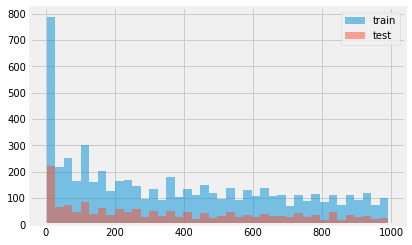

In [26]:
feature = 'AGN_CNT_RCT_12_MON'
tmp = train[feature][train[feature] <1000]
tmp2 = test[feature][test[feature] <1000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()

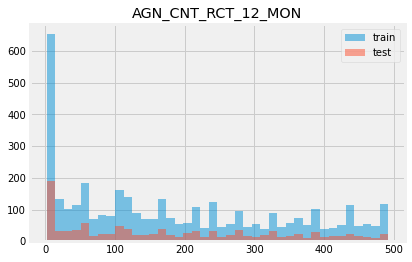

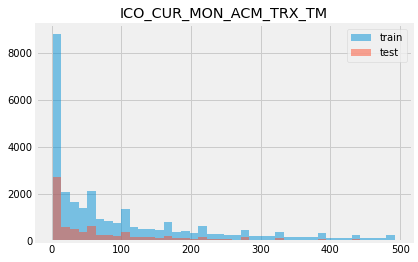

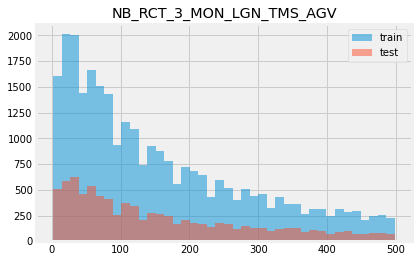

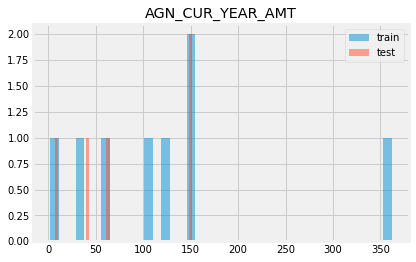

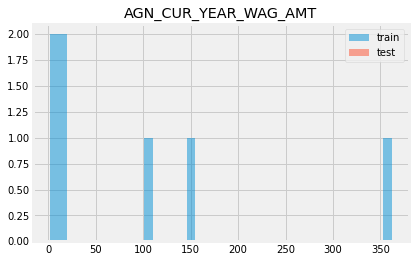

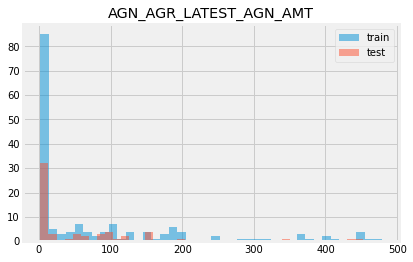

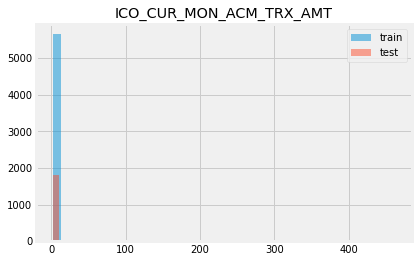

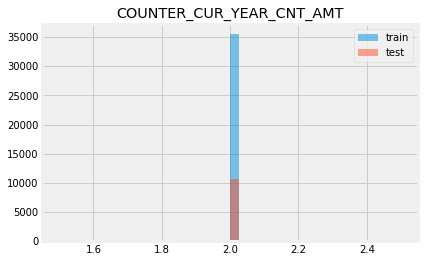

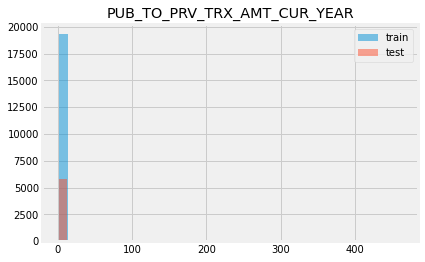

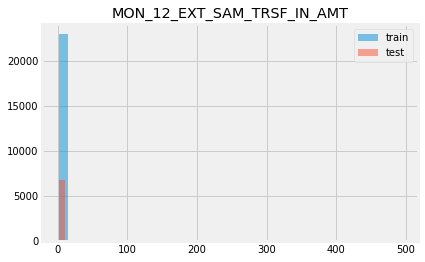

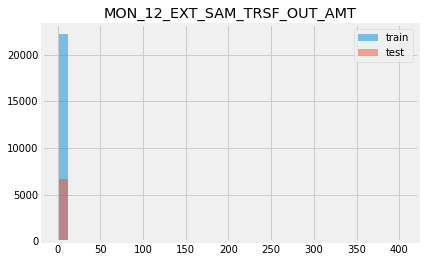

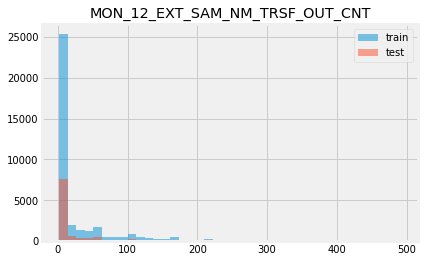

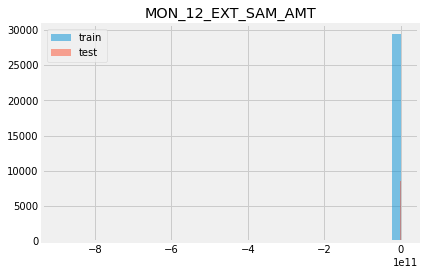

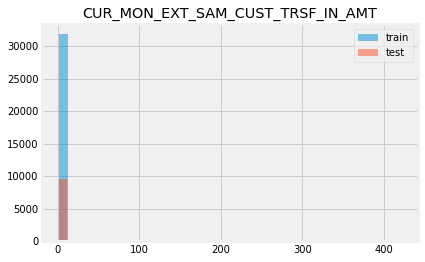

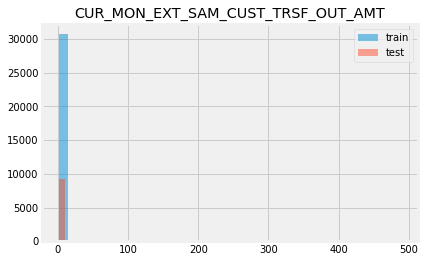

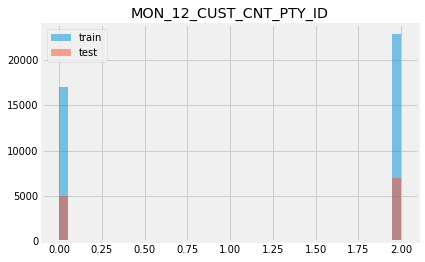

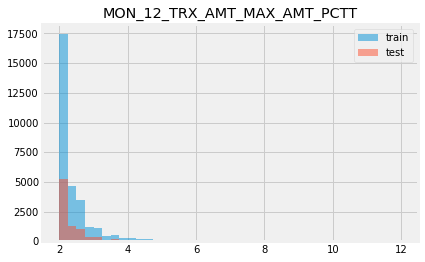

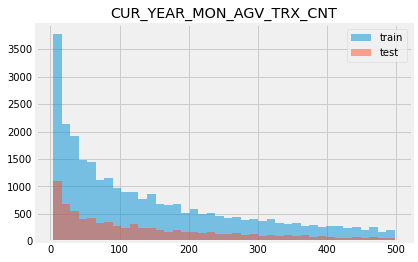

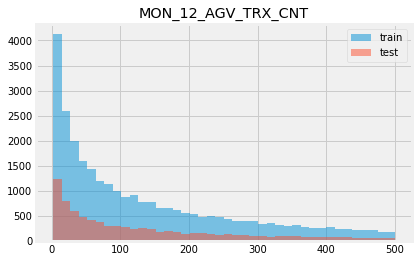

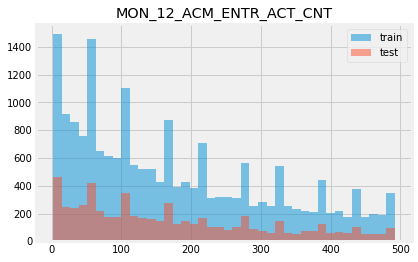

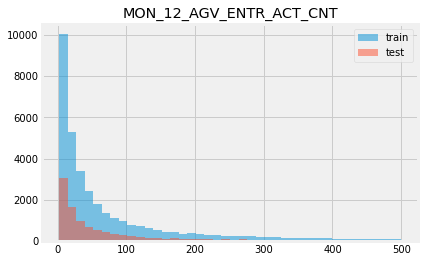

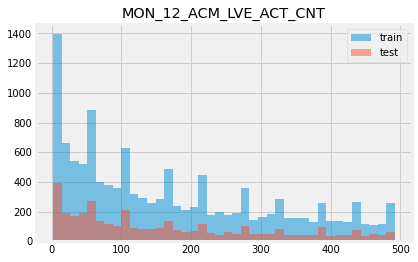

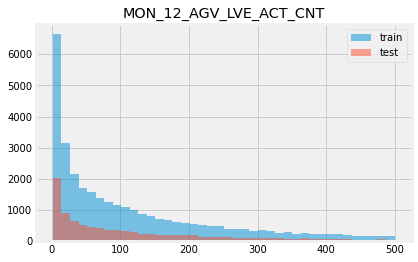

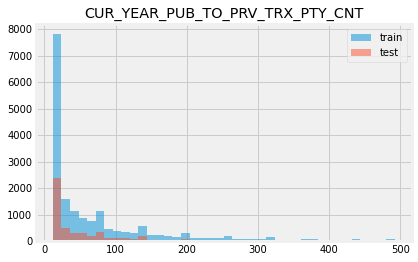

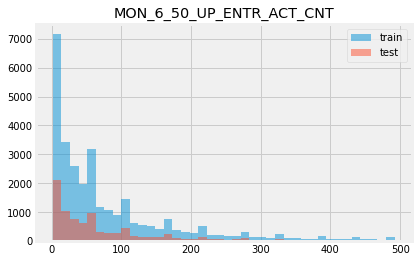

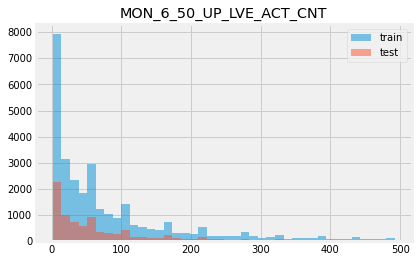

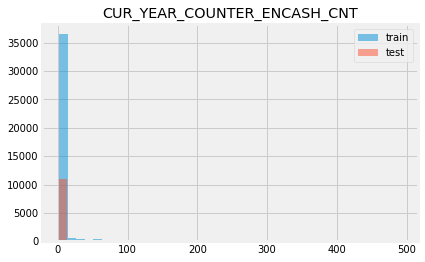

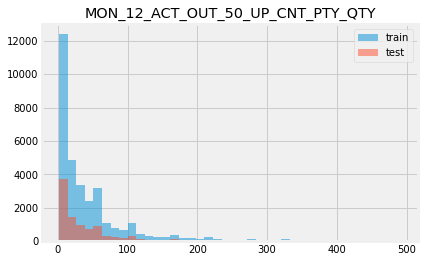

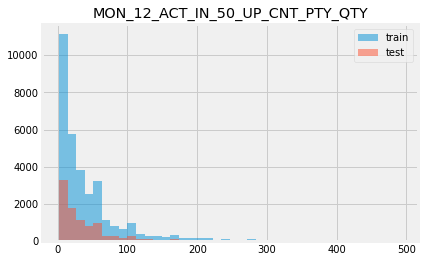

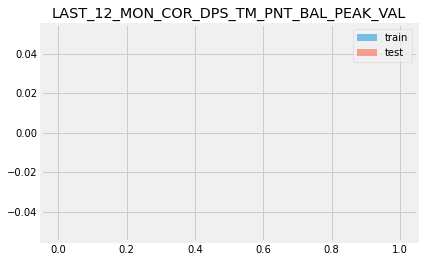

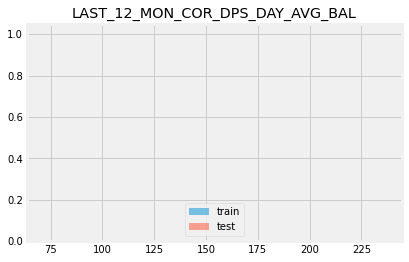

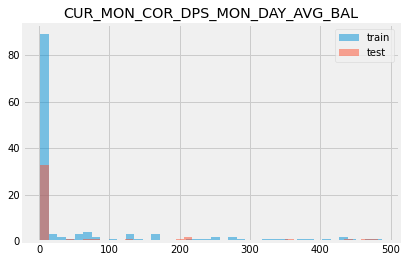

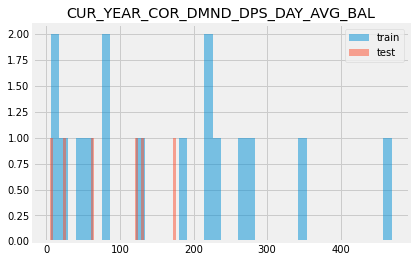

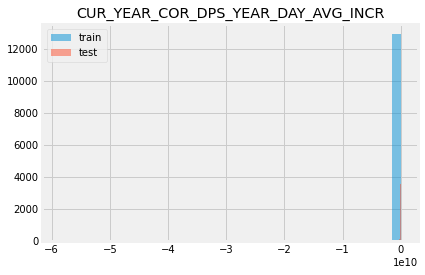

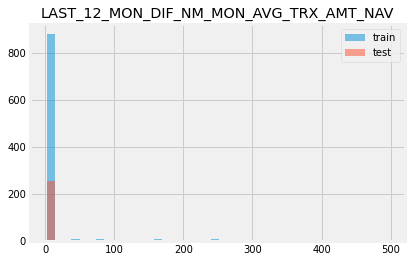

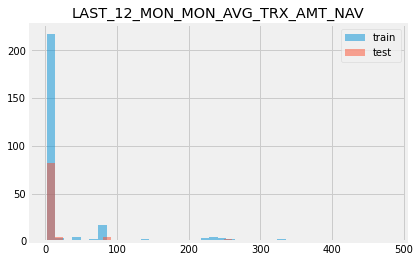

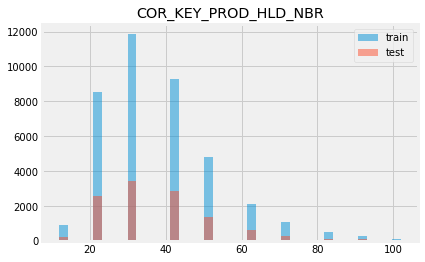

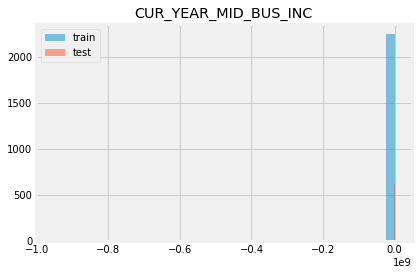

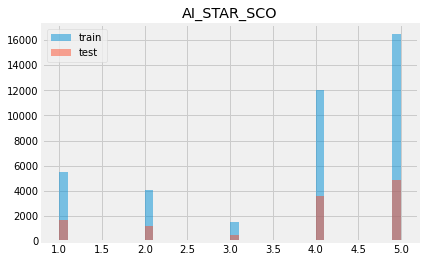

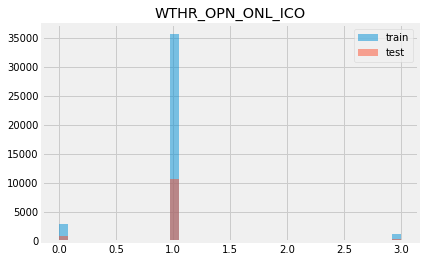

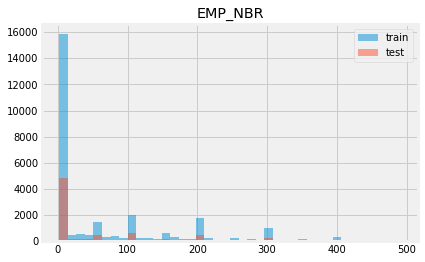

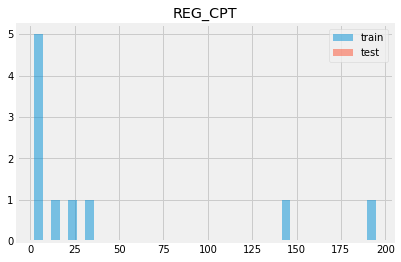

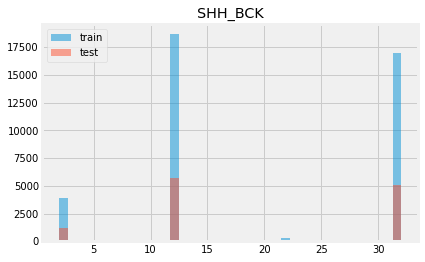

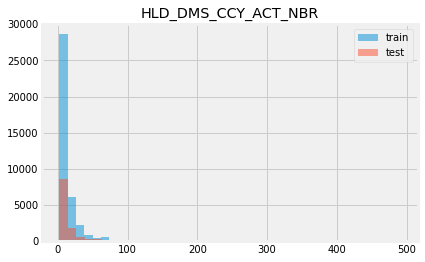

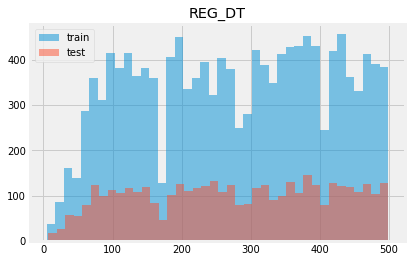

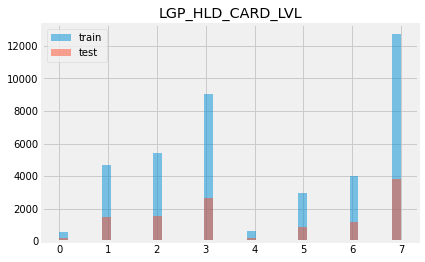

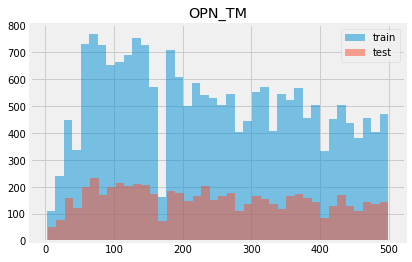

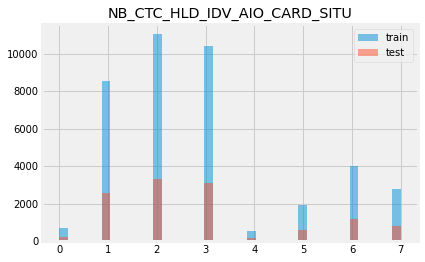

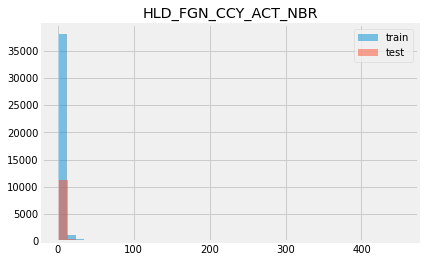

In [38]:
for feature in train.columns[2:]:
    tmp = train[feature][train[feature] <500]
    tmp2 = test[feature][test[feature] <500]
    plt.figure()
    plt.hist(tmp, bins=40, label='train',alpha=0.5)
    plt.hist(tmp2, bins=40, label='test',alpha=0.5)
    plt.legend()
    plt.title(feature)

In [40]:
#需要进一步确认
[ 'AGN_CUR_YEAR_WAG_AMT', 'AGN_AGR_LATEST_AGN_AMT',
'MON_12_EXT_SAM_NM_TRSF_OUT_CNT','MON_12_EXT_SAM_AMT','MON_12_CUST_CNT_PTY_ID'
,'CUR_MON_COR_DPS_MON_DAY_AVG_BAL','CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL',
'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR','LAST_12_MON_MON_AVG_TRX_AMT_NAV','LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV',
'EMP_NBR']

#分桶后只有一列
['ICO_CUR_MON_ACM_TRX_AMT','COUNTER_CUR_YEAR_CNT_AMT','PUB_TO_PRV_TRX_AMT_CUR_YEAR'
,'MON_12_EXT_SAM_TRSF_IN_AMT', 'MON_12_EXT_SAM_TRSF_OUT_AMT','CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'
,'CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT', 'CUR_YEAR_COUNTER_ENCASH_CNT','CUR_YEAR_MIN_BUS_INC'
,'HLD_FGN_CCY_ACT_NBR']

#没数据
['AGN_CUR_YEAR_AMT','LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL','LAST_12_MON_COR_DPS_DAY_AVG_BAL','REG_CPT']


['LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL',
 'LAST_12_MON_COR_DPS_DAY_AVG_BAL',
 'REG_CPT']

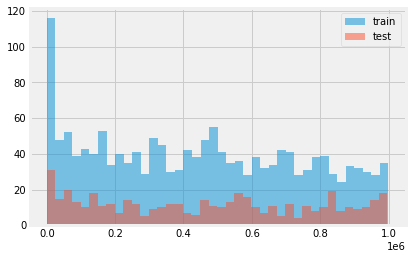

In [25]:
train['AGN_CUR_YEAR_AMT'].describe()
# 这里的2可能是溢出，感觉可以直接作为空值处理，分布差异还是蛮大的，而且数值巨大，需要归一化处理
#test['AGN_CUR_YEAR_AMT'].value_counts()
feature = 'AGN_CUR_YEAR_AMT'
tmp = train[feature][train[feature] <1000000]
tmp2 = test[feature][test[feature] <1000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()

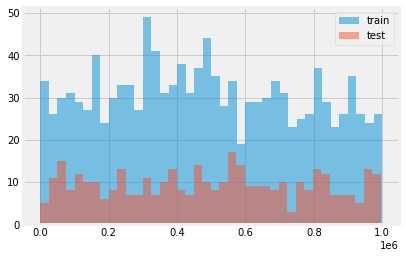

In [26]:
train['AGN_CUR_YEAR_WAG_AMT'].describe()
feature = 'AGN_CUR_YEAR_WAG_AMT'
tmp = train[feature][train[feature] <1000000]
tmp2 = test[feature][test[feature] <1000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()

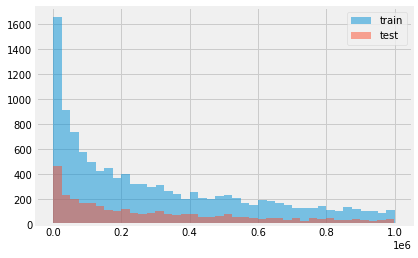

In [27]:
train['AGN_AGR_LATEST_AGN_AMT'].describe()
feature = 'AGN_AGR_LATEST_AGN_AMT'
tmp = train[feature][train[feature] <1000000]
tmp2 = test[feature][test[feature] <1000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()

count    3.340000000000000e+03
mean     9.684088134235928e+08
std      5.841768707020948e+09
min      3.000000200000000e+07
25%      5.771243717500000e+07
50%      1.310697472500000e+08
75%      4.143185395250000e+08
max      1.619718085795000e+11
Name: ICO_CUR_MON_ACM_TRX_AMT, dtype: float64

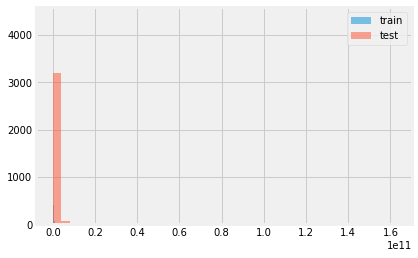

In [46]:
train['ICO_CUR_MON_ACM_TRX_AMT'].describe()
feature = 'ICO_CUR_MON_ACM_TRX_AMT'
tmp = train[feature][train[feature] >30000000 ][train[feature] < 2000000000]
tmp2 = test[feature][test[feature] >30000000][train[feature] < 2000000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp2.describe()

count    2.860000000000000e+02
mean     7.358656159440559e+06
std      3.977205551659274e+06
min      3.000002000000000e+06
25%      4.370002000000000e+06
50%      6.000002000000000e+06
75%      9.620002000000000e+06
max      1.984554410000000e+07
Name: COUNTER_CUR_YEAR_CNT_AMT, dtype: float64

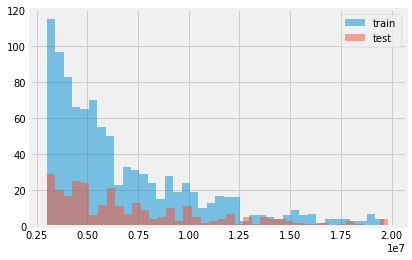

In [51]:
train['COUNTER_CUR_YEAR_CNT_AMT'].describe()
feature = 'COUNTER_CUR_YEAR_CNT_AMT'
tmp = train[feature][train[feature] >3000000][train[feature] < 20000000]
tmp2 = test[feature][test[feature] >3000000][test[feature] < 20000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp2.describe()

count    1.861000000000000e+03
mean     8.164763261526061e+06
std      4.491516516477012e+06
min      3.000002000000000e+06
25%      4.516124000000000e+06
50%      6.733657200000000e+06
75%      1.078104800000000e+07
max      1.998119190000000e+07
Name: PUB_TO_PRV_TRX_AMT_CUR_YEAR, dtype: float64

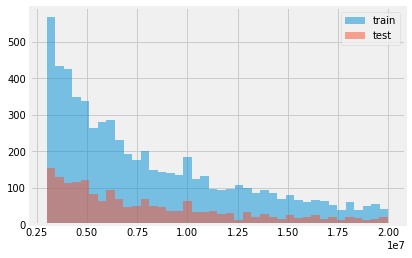

In [52]:

train['PUB_TO_PRV_TRX_AMT_CUR_YEAR'].describe()
feature = 'PUB_TO_PRV_TRX_AMT_CUR_YEAR'
tmp = train[feature][train[feature] >3000000][train[feature] < 20000000]
tmp2 = test[feature][test[feature] >3000000][test[feature] < 20000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp2.describe()


count    7.970000000000000e+02
mean     9.735708720577164e+06
std      4.766671565071108e+06
min      3.000002000000000e+06
25%      5.415165300000000e+06
50%      9.141760500000000e+06
75%      1.400000200000000e+07
max      1.999000200000000e+07
Name: MON_12_EXT_SAM_TRSF_IN_AMT, dtype: float64

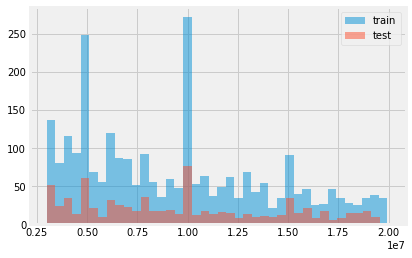

In [53]:
train['MON_12_EXT_SAM_TRSF_IN_AMT'].describe()
feature = 'MON_12_EXT_SAM_TRSF_IN_AMT'
tmp = train[feature][train[feature] >3000000][train[feature] < 20000000]
tmp2 = test[feature][test[feature] >3000000][test[feature] < 20000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp2.describe()

count    9.470000000000000e+02
mean     9.827965342661034e+06
std      4.725068288187432e+06
min      3.000002000000000e+06
25%      5.613494000000000e+06
50%      9.600002000000000e+06
75%      1.350371050000000e+07
max      1.999950200000000e+07
Name: MON_12_EXT_SAM_TRSF_OUT_AMT, dtype: float64

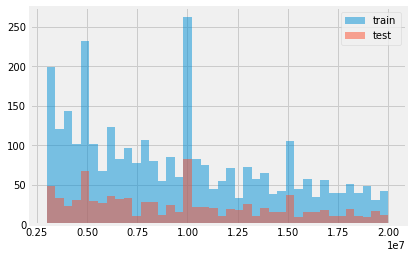

In [54]:

feature = 'MON_12_EXT_SAM_TRSF_OUT_AMT'
tmp = train[feature][train[feature] >3000000][train[feature] < 20000000]
tmp2 = test[feature][test[feature] >3000000][test[feature] < 20000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp2.describe()


2.000000200000000e+07    40
1.000000200000000e+07    24
1.500000200000000e+07    11
2.999930200000000e+07     5
1.999930200000000e+07     5
                         ..
1.335557640000000e+07     1
6.248317800000000e+06     1
1.931166750000000e+07     1
5.267808300000000e+06     1
1.077069990000000e+07     1
Name: LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL, Length: 13724, dtype: int64

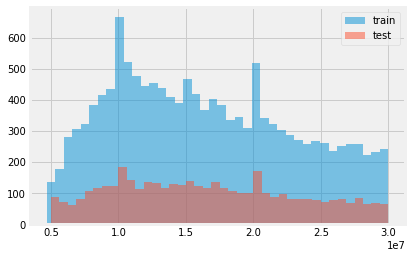

In [18]:
feature = 'LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL'
tmp = train[feature][train[feature] >3000000][train[feature] < 30000000]
tmp2 = test[feature][test[feature] >3000000][test[feature] < 30000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp.value_counts()
#tmp2.value_counts()

5.000002000000000e+06    30
5.524863900000000e+06     6
5.086016200000000e+06     3
7.182506600000000e+06     2
1.657458760000000e+07     2
                         ..
5.337341100000000e+06     1
5.569640200000000e+06     1
1.646861480000000e+07     1
1.034815740000000e+07     1
2.102510425000000e+08     1
Name: CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL, Length: 39739, dtype: int64

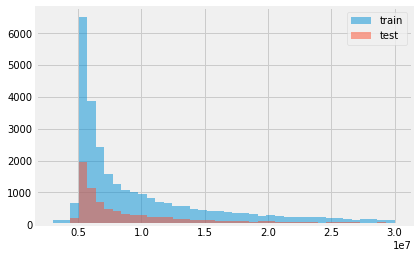

In [21]:
feature = 'CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL'

tmp = train[feature][train[feature] >3000000][train[feature] < 30000000]#5000000000
tmp2 = test[feature][test[feature] >3000000][test[feature] < 30000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()

5.524863900000000e+06    6
2.000000000000000e+00    4
4.195488000000000e+05    3
1.657458760000000e+07    2
5.340074200000000e+06    2
                        ..
1.045780000000000e+06    1
6.192926400000000e+06    1
4.864892700000000e+06    1
1.004697000000000e+06    1
8.671145120000000e+07    1
Name: CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR, Length: 39872, dtype: int64

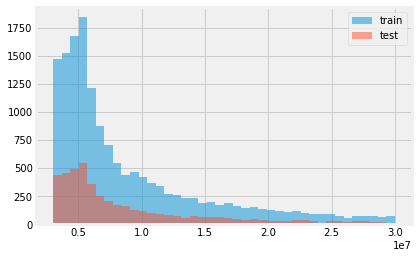

In [24]:
feature = 'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR'
tmp = train[feature][train[feature] >3000000][train[feature] < 30000000]#5000000000
tmp2 = test[feature][test[feature] >3000000][test[feature] < 30000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()

2.000000000000000e+00    839
8.333335300000000e+06     35
1.666668700000000e+06     34
1.666666870000000e+07     23
8.333333530000000e+07     20
                        ... 
1.103201402900000e+09      1
2.742643200000000e+07      1
1.519584813000000e+08      1
8.540320109999999e+07      1
5.799887520000000e+07      1
Name: LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV, Length: 38338, dtype: int64

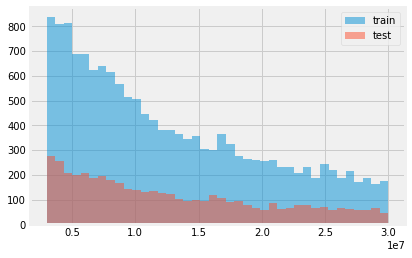

In [25]:
feature = 'LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV'
tmp = train[feature][train[feature] >3000000][train[feature] < 30000000]#5000000000
tmp2 = test[feature][test[feature] >3000000][test[feature] < 30000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()


2.000000000000000e+00    184
1.666668700000000e+06     27
8.333353000000000e+05     26
1.666666870000000e+07     23
8.333335300000000e+06     19
                        ... 
1.100742577000000e+08      1
4.631314700000000e+06      1
4.875774400000000e+06      1
8.792740699999999e+06      1
1.395231325000000e+08      1
Name: LAST_12_MON_MON_AVG_TRX_AMT_NAV, Length: 39106, dtype: int64

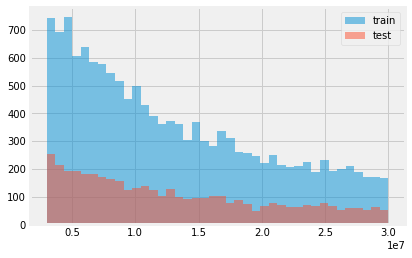

In [26]:

feature = 'LAST_12_MON_MON_AVG_TRX_AMT_NAV'
tmp = train[feature][train[feature] >3000000][train[feature] < 30000000]#5000000000
tmp2 = test[feature][test[feature] >3000000][test[feature] < 30000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()


2.000000000000000         737
2832.199999999999818      515
473.699999999999989        66
2827.099999999999909       43
2360.500000000000000       41
                         ... 
17065.000000000000000       1
74329.800000000002910       1
3326.199999999999818        1
10114.899999999999636       1
224234.500000000000000      1
Name: CUR_YEAR_MID_BUS_INC, Length: 34948, dtype: int64

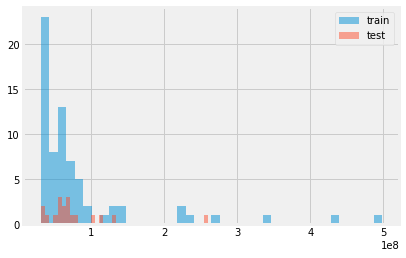

In [29]:

feature = 'CUR_YEAR_MID_BUS_INC'
tmp = train[feature][train[feature] >30000000][train[feature] < 500000000]#5000000000
tmp2 = test[feature][test[feature] >30000000][test[feature] < 500000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()



100000002.0     4737
10000002.0      3860
50000002.0      3455
500000002.0     1578
20000002.0      1545
                ... 
3979035392.0       1
32650002.0         1
87217552.0         1
400010002.0        1
1007800002.0       1
Name: REG_CPT, Length: 6060, dtype: int64

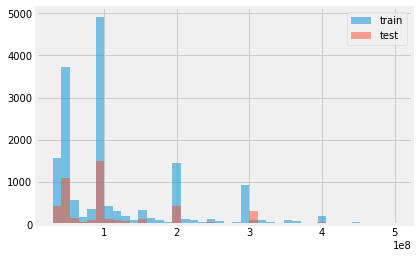

In [30]:

feature = 'REG_CPT'
tmp = train[feature][train[feature] >30000000][train[feature] < 500000000]#5000000000
tmp2 = test[feature][test[feature] >30000000][test[feature] < 500000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()


32.0     11847
42.0      9287
22.0      8534
52.0      4836
62.0      2155
72.0      1122
12.0       935
82.0       514
92.0       301
102.0      133
Name: COR_KEY_PROD_HLD_NBR, dtype: int64

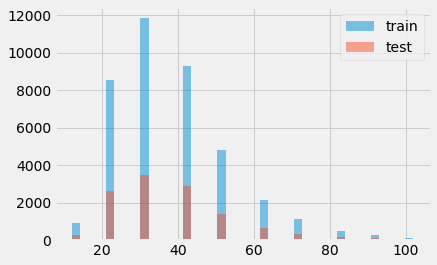

In [6]:
train['COR_KEY_PROD_HLD_NBR'].describe()
feature = 'COR_KEY_PROD_HLD_NBR'
tmp = train[feature]#[train[feature] >3000000][train[feature] < 20000000]
tmp2 = test[feature]#[test[feature] >3000000][test[feature] < 20000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
tmp.value_counts()

In [12]:
cols = ['CUR_MON_COR_DPS_MON_DAY_AVG_BAL', 'CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL',
       'REG_DT', 'CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR', 'REG_CPT',
       'NB_RCT_3_MON_LGN_TMS_AGV', 'LAST_12_MON_COR_DPS_DAY_AVG_BAL',
       'CUR_YEAR_MID_BUS_INC', 'ICO_CUR_MON_ACM_TRX_AMT', 'OPN_TM',
       'CUR_YEAR_MON_AGV_TRX_CNT', 'LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV']
# for feature in cols:
#     tmp = train[feature]#[train[feature] <50000]
#     tmp2 = test[feature]#[test[feature] <50000]
#     plt.figure()
#     plt.hist(tmp, bins=40, label='train',alpha=0.5)
#     plt.hist(tmp2, bins=40, label='test',alpha=0.5)
#     plt.legend()
#     plt.title(feature)


40000